## Subtask 1 Classifcation Data

In [1]:
from nn import *
from miniBatch import *

import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import h5py
import numpy as np



#Import and scale Data
hf = h5py.File('classification.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()
scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train, y_train)     #a better performance was experienced without scaling
#x_test = scaler.fit_transform(x_test, y_test)        #the network works fine with scaling too


print("number of features: " + str(x_train.shape[1]))
print("test data samples: (" + str(x_test[42:47,:])+ ", "+ str(y_test[42:47])+ ")")
print("training  data samples: (" + str(x_train[42:47,:])+ ", "+ str(y_train[42:47])+ ")")
print("number of targets (Test+Train data): "+str(x_test.shape[0]+x_train.shape[0]))

number of features: 2
test data samples: ([[ 2.1492222  10.56104877]
 [14.49736028  8.20308029]
 [ 1.57457666 11.2832286 ]
 [15.94793327  3.45428803]
 [17.20906383  1.95379915]], [[1.]
 [1.]
 [1.]
 [1.]
 [0.]])
training  data samples: ([[13.30774058  2.82429901]
 [14.06296395 15.66411278]
 [11.94544932  8.26194662]
 [ 2.87592905 10.71426883]
 [ 9.95679306 17.93400969]], [[1.]
 [1.]
 [0.]
 [1.]
 [0.]])
number of targets (Test+Train data): 10500


## Subtask 2: Forward Propagation

In [2]:
#initate Network:
layer_sizes=[2, 10, 10, 1]
nn=NeuralNetwork(layer_sizes)

#example of forward propagation:
nn.forward(x_train[42,:])
print(nn.getOutput())

[[0.0034815]]


A brief explanation of implementation:
- __init__(self,layer_sizes) <br>
defines the activation function of the neuronal network with the given input size as well as the biases (set to zero) and the Weights. The weights are initializes as described in the lecture with N(0,0.02*(layer size)) <br>
- forward(self,input) <br>
Takes a float tuple and propagates the defined Netok and saves the resulting activation values. The forward set is calculated as described in the lecture with the formula: (for every layer l) <br>

z = weights[l-1] * activations[l-1]) + biases[l-1] <br>
activations[l] = rbf(z) <br>


- getOutput(self) <br>
return the last Layer of the activation Functions. Which is by the task defined to be size one. 
<br>

How do you store the weights and biases? <br>
the are stored as class variables and accessible thought the corresponding getter functions. <br><br><br>


For a detaild explanation of the code view nn.py with detailed descriptions of the relevant lines.

## Subtask 3: Finite Diference Gradient & Optimization

In [3]:
t_total_start = time.time()

#seut up optimations:
nn = NeuralNetwork(layer_sizes)
weights = nn.getWeights()
biases = nn.getBiases()
param = weights + biases
optimizer = AdamOptimizer(param, 0.01, 0.9, 0.999, 1e-08)

#calculate loss of initual values:
loss = nn.calcLoss(x_train, y_train, nn.getWeights(), nn.getBiases())
lossTest = nn.calcLoss(x_test, y_test, nn.getWeights(), nn.getBiases())
miniBatch = MiniBatch(x_train, y_train)

#initial loss bevor optimization
print("[trainig data loss, test data loss] ")
print(str(loss)+", " + str(lossTest) + "(bevor optimization)")




t_optimize = []
t_grad = []
t_loss = []
all_loss_train = []
all_loss_test = []


count = 0
while loss > 10:       #Threshold for the optimization
    if count < 20:     #an upper bound of iteration steps set to twenty to enable the fast presentation of code
        
        #1)calculating the gradient for an randomly picked minibatch of the data
        t_grad_start = time.time()
        x_train_batch, y_train_batch = miniBatch.getBatch(100)
        grad = (nn.calcGrad(.000001, x_train_batch, y_train_batch))
        t_grad_end = time.time()
        
        #2)updating the wights using the Adam optimizer
        t_optimize_start = time.time()
        param = optimizer.update_params(param , grad)      
        #update_params is slightly modified version of the provided one for details see _stochastic_optimizers.py
        nn.setWeights(param[:len(layer_sizes)-1])
        nn.setBiases(param[len(layer_sizes)-1:])
        t_optimize_end = time.time()

        
        #4) computing  and saving the losses
        t_loss_start = time.time()
        loss = nn.calcLoss(x_train, y_train, nn.getWeights(), nn.getBiases())
        lossTest = nn.calcLoss(x_test, y_test, nn.getWeights(), nn.getBiases())
        all_loss_train.append(float(loss))
        all_loss_test.append(float(lossTest))
        print(str(loss)+", " + str(lossTest))
        t_loss_end = time.time()

        t_optimize.append( t_optimize_end - t_optimize_start)
        t_grad.append(  (t_grad_end - t_grad_start))
        t_loss.append(  (t_loss_end - t_loss_start))
        count += 1
    else:
        print("iterations steps: " + str(count))
        break
    

#computing  the time 
t_optimize = np.mean(t_optimize)
t_grad = np.mean(t_grad)
t_loss = np.mean(t_loss)


t_total_end = time.time()
t_total = t_total_end - t_total_start

print("Time total: " + str(t_total))
print("avg Time for gradient calc: " + str(t_grad))
print("avg Time for Adam optimize: " + str(t_optimize))
print("avg Time for loss calc: " + str(t_loss))


[trainig data loss, test data loss] 
241.37625747686155, 4790.706269703723(bevor optimization)
213.6856037474822, 4201.311839636795
191.26960387216178, 3718.0306351931154
175.29482958227294, 3360.445110719766
169.27832758025633, 3198.128052418027
172.68577724730233, 3234.1876562345174
170.92834648145774, 3208.9281274633177
163.38535825467622, 3091.961565165046
155.62531996252443, 2975.4356134369937
148.7006522293221, 2877.6397588314844
143.30538917878394, 2811.978608341476
139.3232527875111, 2771.2481574378708
135.97304810596452, 2743.7456304788057
133.20701103844667, 2729.152845717142
130.99727892862458, 2720.046990531167
129.8729701444786, 2726.927588802127
129.5211542765923, 2744.9348477588337
129.44144702152906, 2766.4729344264742
129.24383031309583, 2783.7686936499626
128.83603504576053, 2792.917094591793
128.55015395917968, 2801.9700828359137
iterations steps: 20
Time total: 25.455617427825928
avg Time for gradient calc: 0.9134758353233338
avg Time for Adam optimize: 9.9921226501

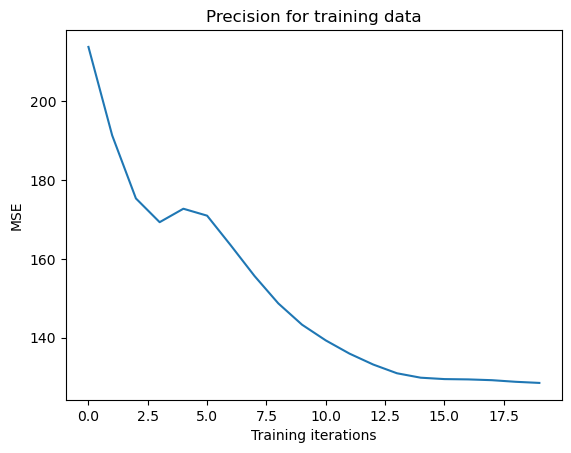

In [4]:
#Ploting the Train Data

x = np.array(range(0, len(all_loss_train)))
plt.plot(x,all_loss_train)
plt.xlabel('Training iterations')
plt.ylabel('MSE')
plt.title('Precision for training data')
plt.show()



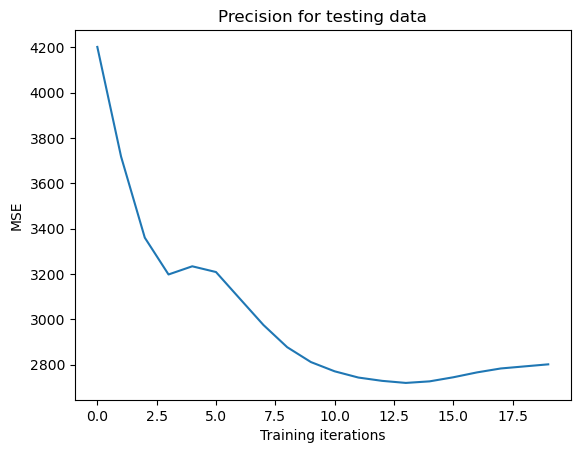

In [5]:
#Ploting the Test Data
plt.plot(x,all_loss_test, label = "line 1")
plt.xlabel('Training iterations')
plt.ylabel('MSE')
plt.title('Precision for testing data')
plt.show()

Sub Task 2 was implemented as follows: 
At first, the neuronal network as described in Subtask 1 was set up, as well as the provided Adam optimizer. After calculating the initial loss for training and test data for the untrained network, there is a loop over a defined amount of Training interactions. The training is stopped if the network obtains an MSE lower the 10 on the training Data. Because depending on the Hyperparameters of the Optimizer and the Gradiencalcultaion this can take up to several hours, there is also a stoppage criterion for the Training iteration implement. To provide the user with a proof of concept training run this is set to 20. The results of training up to an MSE below 10 are presented below. <br>

Every training loop consists of 3 Steps:<br>
1) Calculating the gradient of the current Network configuration<br>
nn.calcGrad(self, e, X, y) ist the specified function for calculating an finite gradient. It perceives the datapair (X,y) as well as the margin for calculating the gradient e. It iterates over every element in the wights and the gradient and calculates a pair of +/- e wights and gradient for each element of them. After building the means of these +/- pairs it sums up thous individual gradients to a total gradient over all the weights and biases.<br>
For Building thous gradients the algorithm only considers a subset of the training data. <br> 
getBatch(self, outputSize) shuffles the Data "randomly" and returns the first pair of (X,y) data up to the given output size. <br>
2) updating the wights using the Adam optimizer<br>
This rather self-explaining step updates the Gradient using the provided Admoptimizer. <br>
4) calculating and saving the losses <br>
The losses for training and test Data are calculated with the call loss (self, X, y, W, b) function. It receives the dataset (X, Y) and the current weights and biasses of the nn. It dan predicts the y vector with the provided weights and biasses and Returns the MSE of the given and the Approximated y. <br><br><br><br>


for a detaild explanation of the code view nn.py and miniBatch.py  with detailed descriptions of the relevant lines



# rbf activation Function
MSE Test Data: 51.34672699308729 <br>
MSE Test Data: 1270.3686223687314<br>
iterations steps: 5000<br>
Time total: 9761.02359867095947  (aprox. 2.5h)<br>
avg Time for gradient calc: 1.4439192971229553<br>
avg Time for Adam optimize: 0.00013087005615234376<br>
avg Time for loss calc: 0.5011011574268341<br>

The optimizer had to be stopped after 5000 iteration because the runtime was extendin resonalble orders. 

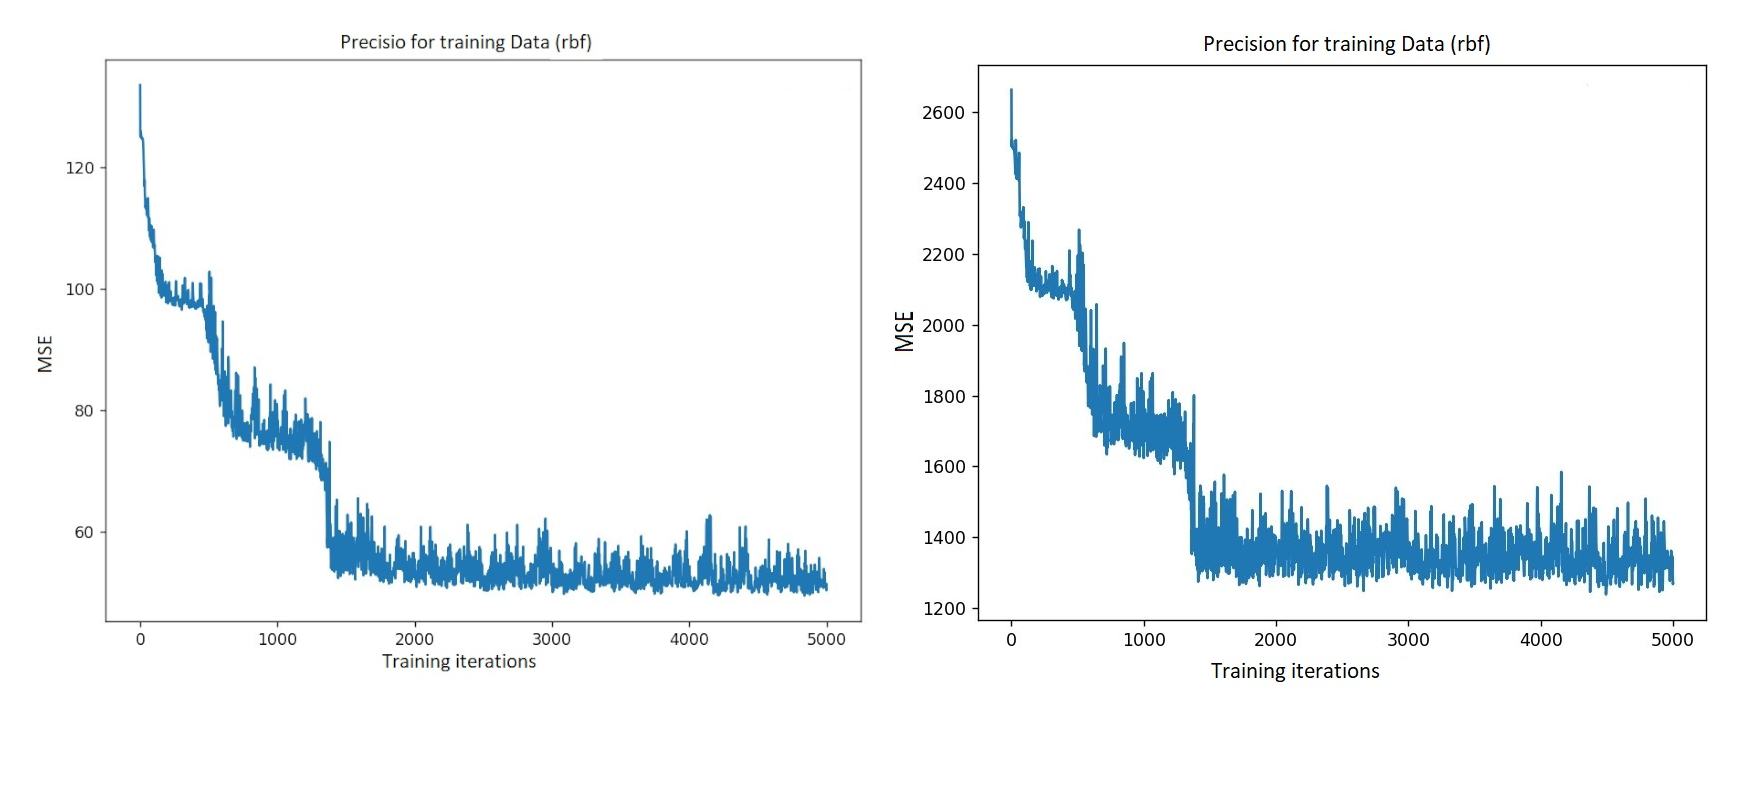

# ReLU activation Function
MSE Test Data: 9.46714892944021 <br>
MSE Test Data: 389.686577574243<br>
iterations steps: 5163<br>
Time total: 6711.769384384155  (aprox. 1.5h)<br>
avg Time for gradient calc: 0.9767854620974351<br>
avg Time for Adam optimize: 0.00013522995121284217<br>
avg Time for loss calc: 0.3308811749929584<br>

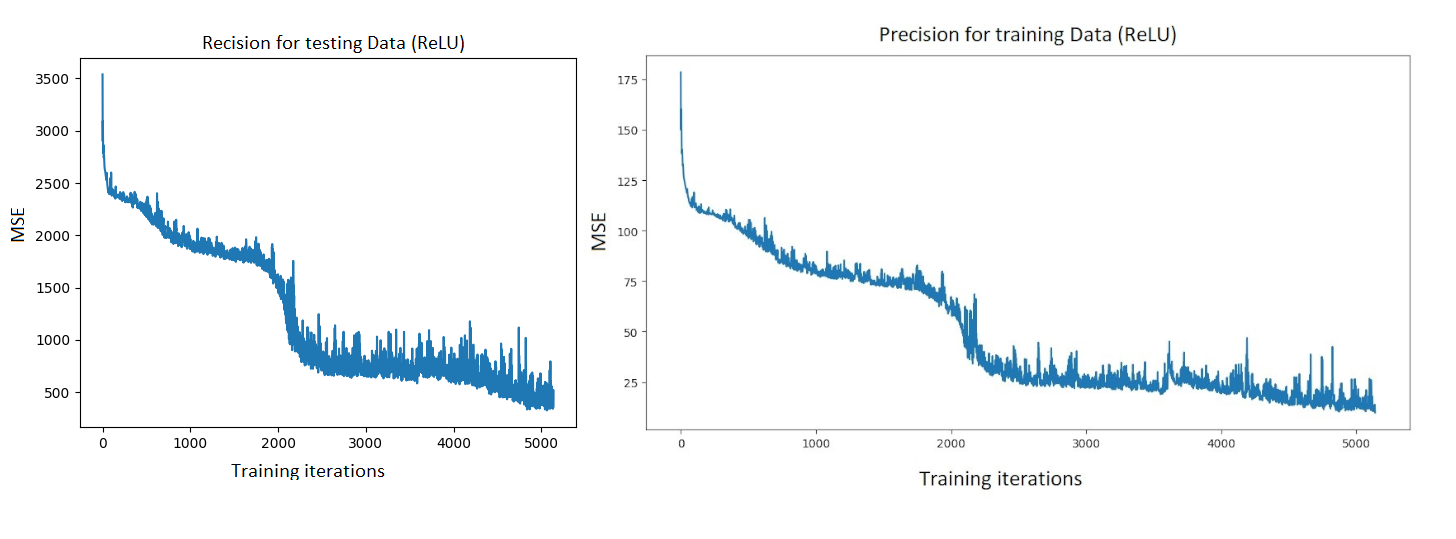

Do you observe any differences in performance for the different architectures and
activation functions? <br>
Yes, the gradient calculation time for the RBF Kernal was on avg. 0.5 seconds slower for every gradient calculation. Also, The RBF network got stuck in a local minimum. 